Loading the data

------------------------------------


In [4]:
import sys
sys.path.append("..")

In [8]:
import chess
import chess.pgn
import numpy as np
import pandas as pd

# add parent directory to path



data = pd.read_csv("../lichess_db_puzzle.csv/lichess_db_puzzle.csv", header=None)


In [17]:
dataCols = data[[1,2]]

In [19]:
data_array = dataCols.to_numpy()

In [20]:
data_array[0]

array(['r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24',
       'f2g3 e6e7 b2b1 b3c1 b1c1 h6c1'], dtype=object)

Encode the data

-------------------------------------------------------


note: data required 99GB of initialized space.... 

In [167]:
%load_ext autoreload
%autoreload 2

from enc_dec_chess import *

test = data_array[750000:775000]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
board_image = np.zeros((len(test), 64*2 + 64*64), dtype=np.int8)

# for game in games
for i, game in enumerate(test):
    # encode game
    board_image[i] = encode_game_fen(game[0], game[1].split()[0])



Compress and Save the data

-----------------------------------------------------------


In [169]:
# save board image to file for later use with pickle (compressed)
np.savez_compressed("data_unsorted/puzzle_0to749999_unfiltered_compressed.npz", board_image)

In [170]:
with open("data_unsorted/puzzle_0to749999_unfiltered_compressed.npz", "rb") as f:
    board_image_loaded = np.load(f, allow_pickle=True)["arr_0"]

Analyze the distribution of moves

-----------------------------------------------------------

In [171]:
# plot the frequency of each move in a game

from move_frequency import *

frequency = moveFrequency(board_image_loaded)

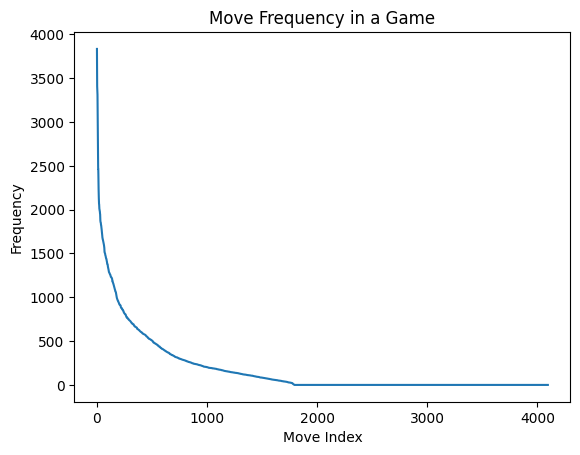

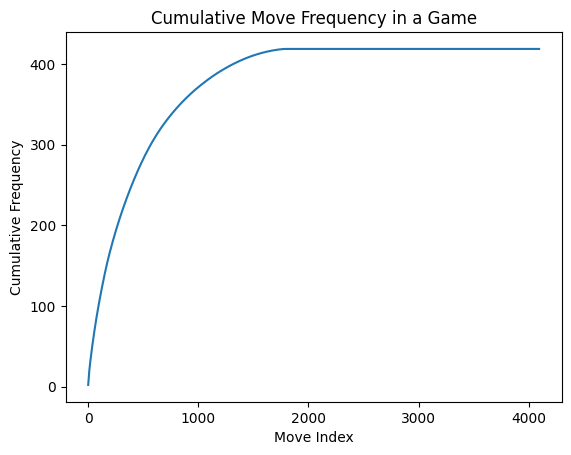

In [172]:
plotFrequency(frequency)

In [174]:
mean_moves = np.mean(frequency[:-1])

print("Mean frequency of moves: {}".format(mean_moves))

Mean frequency of moves: 183.105224609375


In [180]:
# quartiles of the frequency of moves
q1 = np.quantile(frequency[:-1], 0.25)
q2 = np.quantile(frequency[:-1], 0.5)
q3 = np.quantile(frequency[:-1], 0.75)

print("Quartiles of the frequency of moves: {}, {}, {}".format(q1, q2, q3))


Quartiles of the frequency of moves: 0.0, 0.0, 194.25


In [181]:
print("Number of moves with frequency > 0: {}".format(np.count_nonzero(frequency[:-1])))

Number of moves with frequency > 0: 1792


In [184]:
print("Number of moves with frequency > 0.5 * mean: {}".format(np.count_nonzero(frequency[:-1] > 0.5 * mean_moves)))

Number of moves with frequency > 0.5 * mean: 1462


In [185]:
print( "Number of moves with frequency > 0.75 * mean: {}".format(np.count_nonzero(frequency[:-1] > 0.75 * mean_moves)))

Number of moves with frequency > 0.75 * mean: 1259


In [188]:
print("Number of moves with frequency > 5 * mean: {}".format(np.count_nonzero(frequency[:-1] > 5 * mean_moves)))

Number of moves with frequency > 5 * mean: 207


Analyze the distribution of moves from each square and to each square

----------------------------------------------------------

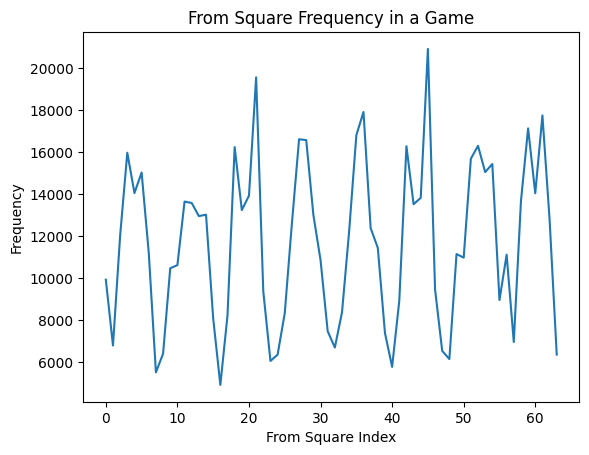

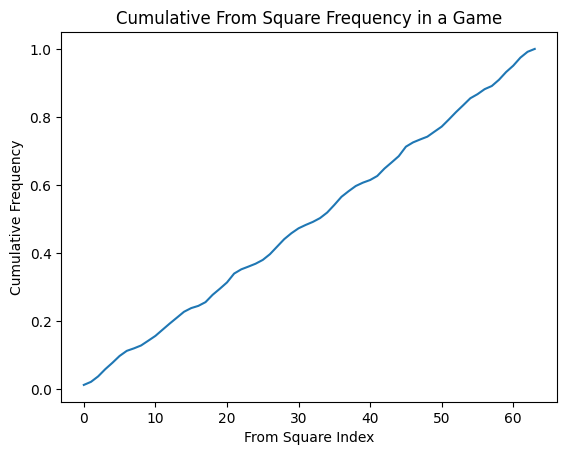

In [199]:
from move_frequency import *

fromSquareFrequency(board_image_loaded)

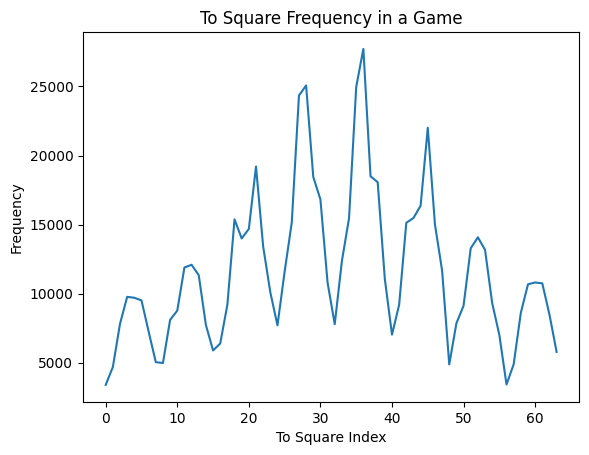

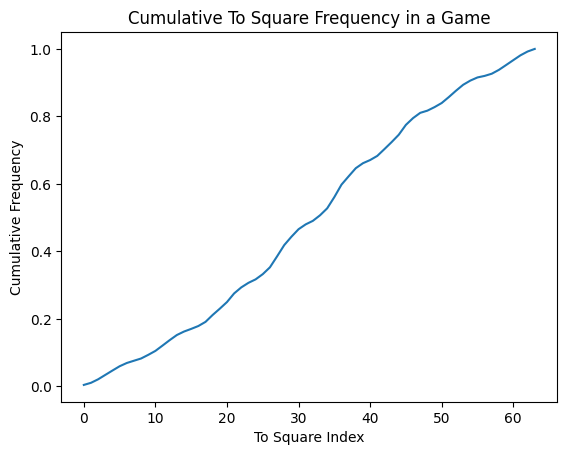

In [200]:
toSquareFrequency(board_image_loaded)

Currently without balancing the dataset, it appears the model is only learning the probability of each move... 

In general after each batch, the test on validation set outputs the same move for every board input

In [3]:
import numpy as np

In [5]:
with open("../data_validation/temp_validation_data_0.npz", "rb") as f:
    board_image_loaded = np.load(f, allow_pickle=True)
    

In [9]:
print(board_image_loaded)

In [15]:
with open("../data/data_3.npz", "rb") as f:
    validation = np.load(f, allow_pickle=True)['data']

In [16]:
validation

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=int8)